Below code consists of 4 functions:
1. getHtml: It returns the Html of the url 
2. getParentLinks: It binds hyperlinks(Urls correspoding to particular dates) in the wikipedia deletion page to list.
3. unique: This method is used to get the unique links and titles of the proposed pages for deletion.
4. getAllLinks: This method iterates over the links that we get in getParentLinks method and then stores the urls and titles of wiki pages proposed for deletion in dictionary.
    

In [5]:
import requests
import urllib
from bs4 import BeautifulSoup

def getHtml(url):
    response = urllib.urlopen(url)
    soup = BeautifulSoup(response, "html.parser")
    return soup

links=[]
dateTitles=[]
def getParentLinks():
    for header in soup.find_all('ul'):
        para = header.find_all("a")
        for a in para:
            title = a.get('title')
            if title:
                if "Wikipedia:Articles for deletion/Log/2019" in title:
                    link=a.get('href')
                    links.append('https://en.wikipedia.org'+link)
                    dateTitles.append(title)
                
def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

dicPageLinks={}

def getAllLinks():
    i=0;
    dic={}
    for link in links:
        finalLink=getHtml(link)
        spans=finalLink.findAll("span",attrs={'class':'mw-headline'})
        pageTitles=[]
        pageLinks=[]
        print(dateTitles[i])
        for anchor in spans:
            anchorTags=anchor.find_all('a')
            if not anchorTags:
                continue;
            title=anchorTags[0].get('title')
            pageTitles.append(title)
            pageLinks.append("https://en.wikipedia.org"+anchorTags[0].get('href'))
        dic[dateTitles[i]]=pageTitles
        dicPageLinks[dateTitles[i]]=pageLinks
        i+=1
    return dic;
  
url="https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion"
soup=getHtml(url)    

getParentLinks()
links=unique(links)
dateTitles=unique(dateTitles)

dicPageTitles=getAllLinks()



Wikipedia:Articles for deletion/Log/2019 July 6
Wikipedia:Articles for deletion/Log/2019 June 29
Wikipedia:Articles for deletion/Log/2019 July 5
Wikipedia:Articles for deletion/Log/2019 July 4
Wikipedia:Articles for deletion/Log/2019 July 3
Wikipedia:Articles for deletion/Log/2019 July 2
Wikipedia:Articles for deletion/Log/2019 July 1
Wikipedia:Articles for deletion/Log/2019 June 30
Wikipedia:Articles for deletion/Log/2019 June 28
Wikipedia:Articles for deletion/Log/2019 June 27
Wikipedia:Articles for deletion/Log/2019 June 26
Wikipedia:Articles for deletion/Log/2019 June 25
Wikipedia:Articles for deletion/Log/2019 June 24
Wikipedia:Articles for deletion/Log/2019 June 23
Wikipedia:Articles for deletion/Log/2019 June 22
Wikipedia:Articles for deletion/Log/2019 June 21


Below pandas dataframe is created with respect to the data received from previous methods.

In [6]:
import pandas as pd

df=pd.DataFrame([(key, var) for (key, L) in dicPageTitles.items() for var in L], 
                 columns=['key', 'Titles'])

df2=pd.DataFrame([(key, var) for (key, L) in dicPageLinks.items() for var in L], 
                 columns=['key', 'Page Links'])
 
df.insert(loc=1, column='Page Links', value=df2['Page Links'].tolist())
df


,key,Page Links,Titles
0,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Manfred_Unterweger,Manfred Unterweger
1,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Ann_E._Harrison,Ann E. Harrison
2,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Phyllis_Campbell...,Phyllis Campbell Abbott
3,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/OBS_Logistics,OBS Logistics
4,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Oddz_N_Endz,Oddz N Endz
5,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Sumarria_Lunn_Ga...,Sumarria Lunn Gallery
6,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Odia_film_Policy,Odia film Policy
7,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/w/index.php?title=%C4...,İrmaşlı Church (page does not exist)
8,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Jammu_and_Kashmi...,Jammu and Kashmir People's Movement
9,Wikipedia:Articles for deletion/Log/2019 June 30,https://en.wikipedia.org/wiki/Sky_Racket_(vide...,Sky Racket (video game)


MALE_WORDS= Set of male words.
FEMALE_WORDS= Set of female words.

Below code consists of 3 methods:
1. parse_gender: This method receives text of the wiki pages proposed for deletion and then tokenize the sentences in text
2. genderCounts: This method returns the 2 dictionary variable one containing the count of gender of sentences and other contains count of words in the sentence.
3. checkGender: This method returns the gender of the text by intersecting the sentence words with MALE_WORDS and FEMALE_WORDS and returns string male or female or unknown respectively.

In [7]:
from collections import Counter
import nltk
from __future__ import division
from operator import itemgetter

MALE = 'male'
FEMALE = 'female'
UNKNOWN = 'unknown'

MALE_WORDS = set([
    'guy','spokesman','chairman',"men's",'men','him',"he's",'his',
    'boy','boyfriend','boyfriends','boys','brother','brothers','dad',
    'dads','dude','father','fathers','fiance','gentleman','gentlemen',
    'god','grandfather','grandpa','grandson','groom','he','himself',
    'husband','husbands','king','male','man','mr','nephew','nephews',
    'priest','prince','son','sons','uncle','uncles','waiter','widower',
    'widowers'
])

FEMALE_WORDS = set([
    'heroine','spokeswoman','chairwoman',"women's",'actress','women',
    "she's",'her','aunt','aunts','bride','daughter','daughters','female',
    'fiancee','girl','girlfriend','girlfriends','girls','goddess',
    'granddaughter','grandma','grandmother','herself','ladies','lady',
    'lady','mom','moms','mother','mothers','mrs','ms','niece','nieces',
    'priestess','princess','queens','she','sister','sisters','waitress',
    'widow','widows','wife','wives','woman'
])

def checkGender(words):
    maleWordLength = len(MALE_WORDS.intersection(words))
    femaleWordLength = len(FEMALE_WORDS.intersection(words))
    if maleWordLength > 0 and femaleWordLength == 0:
        return MALE
    elif maleWordLength == 0 and femaleWordLength > 0:
        return FEMALE
    else:
        return UNKNOWN


def genderCounts(sentences):
    sents = Counter()
    words = Counter()
    for sentence in sentences:
        gender = checkGender(sentence)
        sents[gender] += 1
        words[gender] += len(sentence)
    return sents, words

def parse_gender(text):
    sentences = [
        [word.lower() for word in nltk.word_tokenize(sentence)]
        for sentence in nltk.sent_tokenize(text)
    ]
    sents, words = genderCounts(sentences)
    total = sum(words.values())
    lstGender=[]
    for gender, count in words.items():
        pcent = (count / total) * 100
        nsents = sents[gender]
        pcent=round(pcent,2)
        data = (pcent, gender)
        lstGender.append(data)
    finalgender=max(lstGender,key=lambda item:item[0])
    totalWords=total
    gen=max(lstGender,key=lambda item:item)
    if finalgender[1]== UNKNOWN:
        if len(lstGender)>1:
            lst = [x for x in lstGender if x!= gen]
            finalgender=max(lst,key=lambda item:item[0])
    return finalgender,totalWords

Below consists of 2 methods:

1. getGender: This method takes dataframe which consists of the wiki page links and the title as parameter and then call getText method which returns the text of the url and then calls parse_gender method with page text as parameter and return list of gender containing gender of of each link in dataframe, list of booleans if page is deleted or not and list of word count of each wiki page

2. getText: This methods returns the text of response passed in parameters.


In [21]:

from bs4.element import Comment
import re
 
lstGender=[]
lstDeleted=[]
def getText(response):
    soup = BeautifulSoup(response, "html.parser")
    text=""
    page = soup.find_all('p')
    for te in page:
        text=text+" "+te.getText().strip()
    text=text.strip()
    return text
    
def getGender(df):
    lstGenderInfo=[]
    lstDeletedInfo=[]
    lstWordCount=[]
    for index, row in df.iterrows():
        response = urllib.urlopen(row["Page Links"])
        if response.getcode()==200:
            text=getText(response)
            if text:
                finalGender,totalWords=parse_gender(text)
                lstWordCount.append(totalWords)
                if finalGender[1]=='male':
                    lstGenderInfo.append("Male")
                elif finalGender[1]=='female':
                    lstGenderInfo.append("Female")
                else:
                    lstGenderInfo.append("Unknown")
            else:
                lstGenderInfo.append("Unknown")
                lstWordCount.append(0)
            lstDeletedInfo.append(False)
        elif response.getcode()==404:
            lstDeletedInfo.append(True)
            lstGenderInfo.append("Unknown")
            lstWordCount.append(0)
    return lstGenderInfo,lstDeletedInfo,lstWordCount

nltk.download('punkt')
lstGender,lstDeleted,lstWordss=getGender(df)

Below we are updating the dataframe we created before and adding new column namely Gender, IsDeleted and Word Count respectively.Then exporting the dataframe to csv.

In [103]:
df.insert(loc=3, column='Gender', value=lstGender)
df.insert(loc=4, column='IsDeleted', value=lstDeleted)
df.insert(loc=5,column='Word Count',value=lstWordss)
df
df.to_csv('C:\Ishan\data.csv', sep='\t', encoding='utf-8')

734
734


,key,Page Links,Titles,Gender,IsDeleted
0,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Foxes:_The_Musical,Foxes: The Musical,Female,False
1,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/ADSL_Max,ADSL Max,Unknown,False
2,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Political_positi...,Political positions of Pat Buchanan,Male,False
3,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Palgeocheon,Palgeocheon,Unknown,False
4,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Sekalli_le_Meokgo,Sekalli le Meokgo,Male,False
5,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Jesse_Waits,Jesse Waits,Male,False
6,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Daniella_Vitale,Daniella Vitale,Female,False
7,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Deborah_Hurwitz,Deborah Hurwitz,Female,False
8,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Yan_Perchuk,Yan Perchuk,Male,False
9,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Lina_Lecaro,Lina Lecaro,Female,False


Below the previously exported csv is just imported so that it can be updated with new data.

In [1]:
import pandas as pd

finalDataFrame = pd.read_csv('data.csv', sep='\t')
finalDataFrame

,Unnamed: 0,Unnamed: 0.1,key,Page Links,Titles,Gender,IsDeleted,Word Count
0,0,0,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Foxes:_The_Musical,Foxes: The Musical,Female,True,0
1,1,1,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Political_positi...,Political positions of Pat Buchanan,Male,True,0
2,2,2,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Sekalli_le_Meokgo,Sekalli le Meokgo,Male,False,0
3,3,3,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Jesse_Waits,Jesse Waits,Male,True,0
4,4,4,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Daniella_Vitale,Daniella Vitale,Female,False,0
5,5,5,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Deborah_Hurwitz,Deborah Hurwitz,Female,True,0
6,6,6,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Yan_Perchuk,Yan Perchuk,Male,True,0
7,7,7,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Lina_Lecaro,Lina Lecaro,Female,True,0
8,8,8,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Cormac_%C3%93_Co...,Cormac Ó Comáin,Male,True,0
9,9,9,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Doud_Eisenhower,Doud Eisenhower,Male,False,0


Below consists of 2 methods:

1. refreshLinkList: This method takes parameter the day that needs to be integrated in the dataframe and crawl its link.
2. refreshPageTitles: This method takes parameter the day that needs to be integrated in the dataframe and crawl its title.

In [40]:

def refreshLinkList(val):
    dicNewPage={}
    for key,valList in dicPageLinks.iteritems():
        pageTitles=[]
        pageLinks=[]
        if key==val:
            for val in valList:
                pageLinks.append(val)
            dicNewPage[key]=pageLinks
    return dicNewPage

def refreshPageTitles(val):
    dicNewPage={}
    for key,valList in dicPageTitles.iteritems():
        pageTitles=[]
        pageLinks=[]
        if key==val:
            for val in valList:
                pageTitles.append(val)
            dicNewPage[key]=pageTitles
    return dicNewPage

updatedLinks=refreshLinkList("Wikipedia:Articles for deletion/Log/2019 July 1")
updatedTitles=refreshPageTitles("Wikipedia:Articles for deletion/Log/2019 July 1")

A new dataframe dfUpdated is created which contains the same columns as Gender,IsDeleted and Word Count .Its the new data that needs to be integrated with the previous dataset.

In [41]:
dfUpdated=pd.DataFrame([(key, var) for (key, L) in updatedTitles.items() for var in L], 
                 columns=['key', 'Titles'])

dfUpdatedLinks=pd.DataFrame([(key, var) for (key, L) in updatedLinks.items() for var in L], 
                 columns=['key', 'Page Links'])

  
dfUpdated.insert(loc=1, column='Page Links', value=dfUpdatedLinks['Page Links'].tolist())


lstg,lstd,lstWordCount=getGender(dfUpdated)
dfUpdated.insert(loc=3, column='Gender', value=lstg)
dfUpdated.insert(loc=4, column='IsDeleted', value=lstd)
dfUpdated.insert(loc=5, column='Word Count', value=lstWordCount)
dfUpdated


,key,Page Links,Titles,Gender,IsDeleted,Word Count
0,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/N2WS_(Veeam),N2WS (Veeam),Unknown,False,421
1,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Fabiano_de_Abreu,Fabiano de Abreu,Male,False,212
2,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/QRG_Health_City,QRG Health City,Male,False,258
3,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Mallorie_Rodak,Mallorie Rodak,Female,False,200
4,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Ben_Phillips_(vo...,Ben Phillips (voice actor),Male,False,27
5,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Pinchas_HaKohen_...,Pinchas HaKohen Lintup,Male,False,940
6,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/T._H._Subash_Cha...,T. H. Subash Chandran,Male,False,124
7,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Dan_Burton_(actor),Dan Burton (actor),Male,False,547
8,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Sabarimala_Ayyap...,Sabarimala Ayyappa Seva Samajam,Unknown,False,76
9,Wikipedia:Articles for deletion/Log/2019 July 1,https://en.wikipedia.org/wiki/Konrad_de_la_Fuente,Konrad de la Fuente,Male,False,146


Below is refreshDataFrame which returns the new dataframe whith updated data.

In [42]:

def refreshDataFrame(dataFrame):
    dataFrame.drop(dataFrame.columns[dataFrame.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    dataFrame.reset_index(drop=True, inplace=True)
    dfUpdated.reset_index(drop=True, inplace=True)
    finalDataFrame=dataFrame.append(dfUpdated, ignore_index = True) 
    return finalDataFrame

finalDataFrame=refreshDataFrame(finalDataFrame)
finalDataFrame

,key,Page Links,Titles,Gender,IsDeleted,Word Count
0,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Foxes:_The_Musical,Foxes: The Musical,Female,True,0
1,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Political_positi...,Political positions of Pat Buchanan,Male,True,0
2,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Sekalli_le_Meokgo,Sekalli le Meokgo,Male,False,0
3,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Jesse_Waits,Jesse Waits,Male,True,0
4,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Daniella_Vitale,Daniella Vitale,Female,False,0
5,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Deborah_Hurwitz,Deborah Hurwitz,Female,True,0
6,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Yan_Perchuk,Yan Perchuk,Male,True,0
7,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Lina_Lecaro,Lina Lecaro,Female,True,0
8,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Cormac_%C3%93_Co...,Cormac Ó Comáin,Male,True,0
9,Wikipedia:Articles for deletion/Log/2019 June 8,https://en.wikipedia.org/wiki/Doud_Eisenhower,Doud Eisenhower,Male,False,0


Below checkDeletedLinks gets the dataframe as parameter and checks every link in "Page Links" column and then returns the dataframe by updating their corresponding "IsDeleted" column value that is if page is deleted than True and if not than False. 
All columns that contains Unknown as gender are also removed 

In [3]:
import requests
import urllib
from bs4 import BeautifulSoup

def checkDeletedLinks(dataFrame):
    i=0
    for row in dataFrame.iterrows():
        if i in dataFrame.index:
            response = urllib.urlopen(dataFrame["Page Links"][i])
            if response.getcode()==200:
                dataFrame["IsDeleted"][i]=False
            else:
                dataFrame["IsDeleted"][i]=True
            i+=1
        else:
            i+=1
    return dataFrame


dfGender=finalDataFrame[~finalDataFrame.Gender.str.contains("Unknown")]
final=checkDeletedLinks(dfGender)
final

In [ ]:
final.to_csv(r'C:\Ishan\data.csv', sep='\t', encoding='utf-8')

Plotting of graphs according to the data

Below plot shows the initial data of 13 days which is further classified into male, female and unknown and implies that around 50% of the documents proposed for deletion were unknown or which does not belong to any gender.

C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


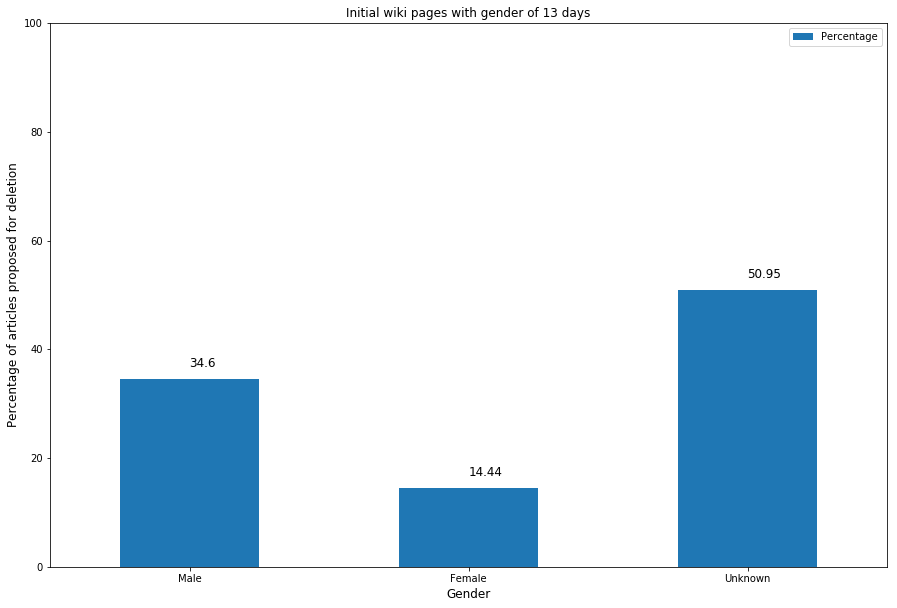

In [72]:
import pandas as pd
import urllib
from __future__ import division

initialDf = pd.read_csv('initial_data.csv', sep='\t')
male=initialDf[initialDf['Gender'].astype(str).str.contains('Male')]
female=initialDf[initialDf['Gender'].astype(str).str.contains('Female')]
unknown=initialDf[initialDf['Gender'].astype(str).str.contains('Unknown')]
total=len(male)+len(female)+len(unknown)

initialDf = pd.DataFrame({'Gender':['Male', 'Female','Unknown'], 'Percentage':[len(male)*100/total,len(female)*100/total,len(unknown)*100/total]})
ax = initialDf.plot.bar(x='Gender', rot=0,title='Initial wiki pages with gender of 13 days',figsize=(15,10))
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Percentage of articles proposed for deletion", fontsize=12)
for idx, label in enumerate(list(initialDf.index)): 
        for acc in initialDf.columns:
            value = initialDf.ix[idx][acc]
            if type(value)!=type('string'):
                val=round(initialDf.ix[idx][acc],2)
                ax.annotate(val,
                            (idx, val),
                             xytext=(0, 12),
                             fontsize=12,
                             textcoords='offset points')
axes = plt.gca()
axes.set_ylim([0,100])
ax


Below chart shows is a scatter plot which shows the male and female documents above and below the median value of word length of the documents(14th June to 1st July) and documents from 3rd June to 13th June were not included as we didnt had word count of these documents.

[]

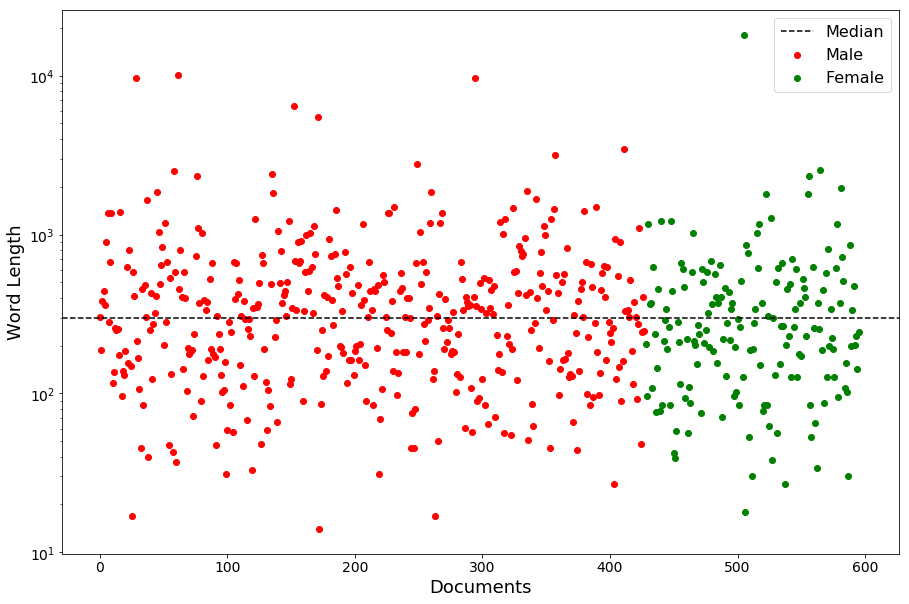

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

final = pd.read_csv('data.csv', sep='\t')

def getRowsWithWordCount(dataFrame):
    #These search key values does not have word count so they are excluded from dataframe
    search_values=["Wikipedia:Articles for deletion/Log/2019 June 3",
                   "Wikipedia:Articles for deletion/Log/2019 June 4",
                   "Wikipedia:Articles for deletion/Log/2019 June 5",
                   "Wikipedia:Articles for deletion/Log/2019 June 6",
                   "Wikipedia:Articles for deletion/Log/2019 June 7",
                   "Wikipedia:Articles for deletion/Log/2019 June 8",
                   "Wikipedia:Articles for deletion/Log/2019 June 9",
                   "Wikipedia:Articles for deletion/Log/2019 June 10",
                   "Wikipedia:Articles for deletion/Log/2019 June 11",
                   "Wikipedia:Articles for deletion/Log/2019 June 12",
                   "Wikipedia:Articles for deletion/Log/2019 June 13",
                  ]
    data=dataFrame[~dataFrame.key.str.contains('|'.join(search_values ))]
    med=data['Word Count'].median()
    df1 = data[data['Word Count'] <= med]
    df2 = data[data['Word Count'] > med]
    return data,med,df1,df2

df_WordCount,median,df1,df2=getRowsWithWordCount(final)

dfM=df_WordCount[(df_WordCount['Gender'] == 'Male')]
dfF=df_WordCount[(df_WordCount['Gender'] == 'Female')]
#print(len(dfM['Word Count']),len(dfF['Word Count']))
plt.scatter(range(len(dfM['Word Count'].tolist())), dfM['Word Count'].tolist(), color='r',label = 'Male')
plt.scatter(range(len(dfM['Word Count'].tolist()),len(df_WordCount)), dfF['Word Count'].tolist(), color='g',label = 'Female')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.yscale('log')
male=df_WordCount.Gender=='Male'
female=df_WordCount.Gender=='Female'
plt.xlabel("Documents",fontsize=18)
plt.ylabel("Word Length",fontsize=18)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

plt.axhline(y=median, color='black', linestyle='dashed', label="Median")
plt.legend(prop={'size': 16})
plt.plot()

Below plot shows the percentage of male and female documents deletedwhose word length was below and above the median
Here we are using df1 and df2 which is calculated in previous step:

df1 contains document whose word length is below or equal to median
df2 contains document whose word length is above median

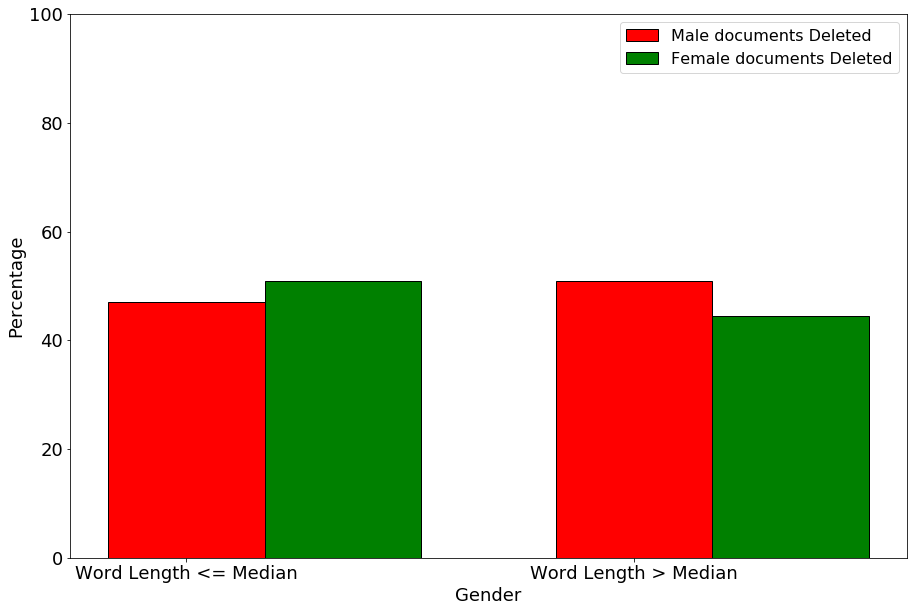

In [84]:
from __future__ import division

#df1 contains document whose word length is below or equal to median
#df2 contains document whose word length is above median
percentMaleDelBelowMed=(len(df1[(df1['Gender'] == 'Male') & (df1['IsDeleted'] == True) ]) / len(df1[(df1['Gender'] == 'Male') ]))*100
percentFemaleDelBelowMed=(len(df1[(df1['Gender'] == 'Female') & (df1['IsDeleted'] == True) ]) / len(df1[(df1['Gender'] == 'Female') ]))*100

percentMaleDelAboveMed=(len(df2[(df2['Gender'] == 'Male') & (df2['IsDeleted'] == True) ]) / len(df2[(df2['Gender'] == 'Male') ]))*100
percentFemaleDelAboveMed=(len(df2[(df2['Gender'] == 'Female') & (df2['IsDeleted'] == True) ]) / len(df2[(df2['Gender'] == 'Female') ]))*100

#print(percentMaleDelBelowMed,percentFemaleDelBelowMed,percentMaleDelAboveMed,percentFemaleDelAboveMed)

gender=['Word Length <= Median','Word Length > Median']
bars=['Male documents Deleted','Female documents Deleted']
pos = np.arange(len(gender))
bar_width = 0.35
lstGenderPercent=[percentMaleDelBelowMed,percentMaleDelAboveMed]
lstDeletedGenderPercent=[percentMaleDelAboveMed,percentFemaleDelAboveMed]

plt.bar(pos,lstGenderPercent,bar_width,color='red',edgecolor='black')
plt.bar(pos+bar_width,lstDeletedGenderPercent,bar_width,color='green',edgecolor='black')

plt.xticks(pos, gender)
axes = plt.gca()
axes.set_ylim([0,100])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title("",fontsize=16)
plt.legend(bars,loc=1,prop={'size': 16})
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.show()


Below chart shows the  total number of male and female documents.

C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


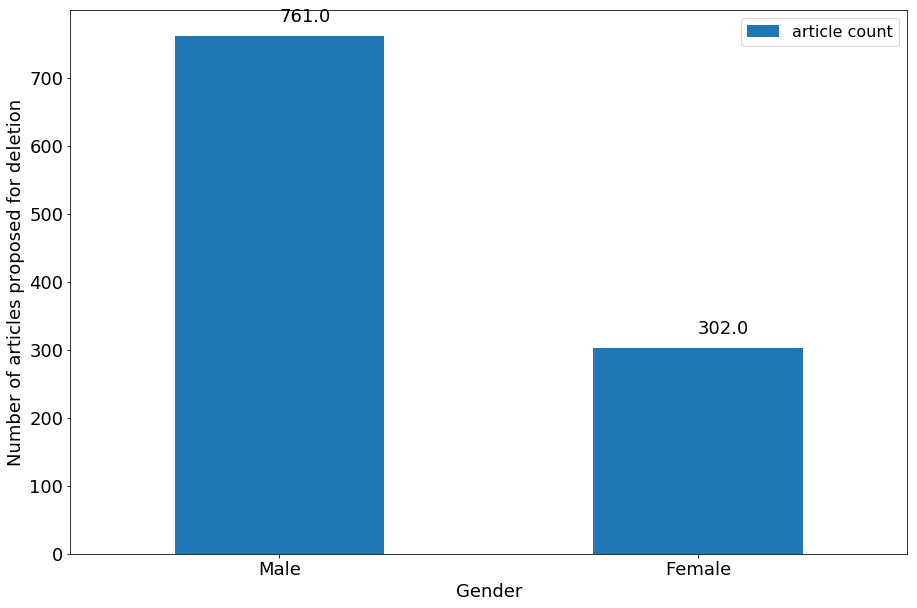

In [90]:
import pandas as pd
import urllib
dfGender = pd.read_csv('data.csv', sep='\t')

male=dfGender[dfGender['Gender'].astype(str).str.contains('Male')]
female=dfGender[dfGender['Gender'].astype(str).str.contains('Female')]
df = pd.DataFrame({'Gender':['Male', 'Female'], 'Count':[len(male),len(female)]})
ax = df.plot.bar(x='Gender', rot=0,figsize=(15,10),fontsize=18)
for idx, label in enumerate(list(df.index)): 
        for acc in df.columns:
            value = df.ix[idx][acc]
            if type(value)!=type('string'):
                val=round(df.ix[idx][acc],2)
                ax.annotate(val,
                            (idx, val),
                             xytext=(0, 15),
                             fontsize=18,
                             textcoords='offset points')

ax.legend(["article count"],prop={'size': 16})
ax.set_xlabel("Gender", fontsize=18)
ax.set_ylabel("Number of articles proposed for deletion", fontsize=18)
ax

Below chart shows that articles about women are more likely proposed for deletion though they fullfil the criteria.

C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Samsung\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


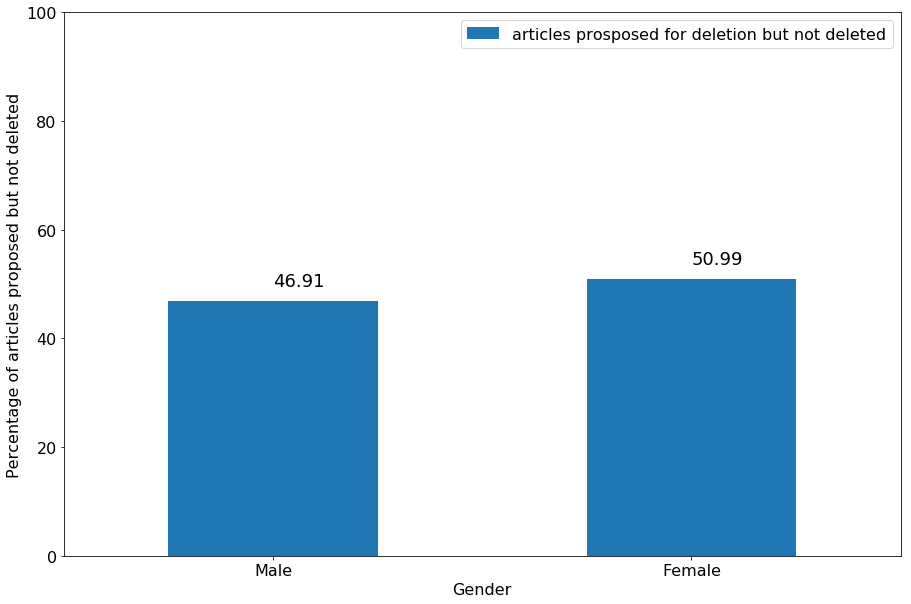

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

dfGender = pd.read_csv('data.csv', sep='\t')

total=len(dfGender)
totalMale=len(dfGender[dfGender['Gender'].astype(str).str.contains('Male')])
maleNotDeleted=len(dfGender[(dfGender['Gender'] == 'Male') & (dfGender['IsDeleted'] == False) ])
femaleNotDeleted=len(dfGender[(dfGender['Gender'] == 'Female') & (dfGender['IsDeleted'] == False) ])
totalFemale=len(dfGender[dfGender['Gender'].astype(str).str.contains('Female')])
df = pd.DataFrame({'Gender':['Male', 'Female'], 'Percent':[(maleNotDeleted/totalMale)*100,(femaleNotDeleted/totalFemale)*100]})
ax = df.plot.bar(x='Gender', rot=0,title='',figsize=(15,10), fontsize=16)
axes = plt.gca()
axes.set_ylim([0,100])

for idx, label in enumerate(list(df.index)): 
        for acc in df.columns:
            value = df.ix[idx][acc]
            if type(value)!=type('string'):
                val=round(df.ix[idx][acc],2)
                ax.annotate(val,
                            (idx, val),
                             xytext=(0, 15),
                             fontsize=18,
                             textcoords='offset points')
ax.set_xlabel("Gender", fontsize=16)
ax.set_ylabel("Percentage of articles proposed but not deleted", fontsize=16)
ax.legend(["articles prosposed for deletion but not deleted"],prop={'size': 16})
ax

Below graph displays the total male and female documents proposed for deletion(Blue bar) and  total male and female documents actually got deleted(Pink bar).

('Total Male documents proposed: ', 761)
('Total Male documents deleted: ', 404)
('Total Female documents proposed: ', 302)
('Total Female documents deleted: ', 148)


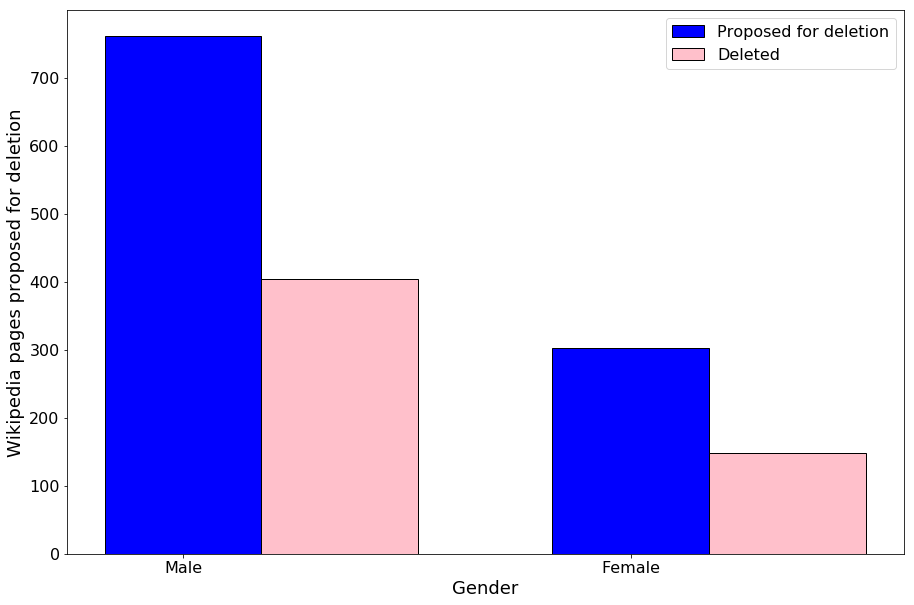

In [91]:
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_csv('data.csv', sep='\t')

gender=['Male','Female']
bars=['Proposed for deletion','Deleted']
pos = np.arange(len(gender))
bar_width = 0.35

maleCount=len(dataFrame[(dataFrame['Gender'] == 'Male') ])
femaleCount=len(dataFrame[(dataFrame['Gender'] == 'Female') ])
total=maleCount+femaleCount

maleCountDeleted=len(dataFrame[(dataFrame['Gender'] == 'Male') & (dataFrame['IsDeleted'] == True) ])
femaleCountDeleted=len(dataFrame[(dataFrame['Gender'] == 'Female') & (dataFrame['IsDeleted'] == True) ])
lstGenderCount=[maleCount,femaleCount]
lstDeletedGenderCount=[maleCountDeleted, femaleCountDeleted]
label = [maleCount,maleCountDeleted,femaleCount,femaleCountDeleted]
print("Total Male documents proposed: ",maleCount)
print("Total Male documents deleted: ",maleCountDeleted)
print("Total Female documents proposed: ",femaleCount)
print("Total Female documents deleted: ",femaleCountDeleted)


plt.bar(pos,lstGenderCount,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,lstDeletedGenderCount,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, gender)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Wikipedia pages proposed for deletion', fontsize=18)
plt.legend(bars,loc=1,prop={'size': 16})
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

plt.show()